# Twitter Durum Analizi

**Bu projede tweetleri toparlayabilmek adına 2 farklı kütüphane kullandım, ve bu tweetleri bir dosyaya kayıt edip bunları NLP süreçlerini uygulamaya soktum, en çok kullanılan kelimelerden bir word cloud oluşturdum ve ardından makine öğrenmesi sınıflandırma algoritmalarını kullanarak bir model oluşturdum.**

![image](Twitter_logo.jpg)   

# Hedefler

**Veri Analizi Adımları**
1. Tweetleri çek
2. Bunları bir veri seti haline getir
3. NLP Adımlarına başla

**Tweet Analizi**
1. Seçilen konuyla alakalı en çok tweet atılan konum 
2. Textblob kütüphanesi yardımıyla atılan tweetlerin durumları belirlenir (negatif mi pozitif mi)
3. Vektorize işlemleri (Makine öğrenmesi algoritmaları için gerekli)
4. Makine Öğrenmesi Methodları ile atılan tweetlerin durum analizi yapılması

## Kütüphaneler

In [1]:
import pandas as pd # Bir veri seti oluşturacağımız için gerekli 
import tweepy       # Sadece twitter'dan veri çekebilmek için gerekli bir kütüphane
from textblob import TextBlob   # NLP projeleriyle alakalı faydalı methodlar bulunan bir kütüphane
import preprocessor.api as p
from typing import List
from nltk.tokenize import TreebankWordTokenizer  
import warnings       # Hata mesajlarını görmek istemediğimiz için kullandığımız kütüphane
import numpy as np
from PIL import Image # Word cloud oluşturuken lazım olan bir kütüphane
from wordcloud import WordCloud
from wordcloud import STOPWORDS   # Word cloud oluştururken bağlaç, edat gibi kelimelerin bulunduğu sınıf
warnings.filterwarnings("ignore")

## Twitter Developer Hesabından Aldığımız Şifreler

In [80]:
COMSUMER_KEY='' # Buraya kendi şifrenizi yapıştıracaksınız
CONSUMER_SECRET=''

**Siz de kendinize ait bir şifre istorsanız Twitter Developer hesabı açıp alabilirsiniz**

# Twython ile Veri Çekme

In [81]:
from twython import Twython

In [82]:
twitter=Twython(COMSUMER_KEY,CONSUMER_SECRET)

In [83]:
results=twitter.search(q='Software', count=100,language='Eng',geocode='33.684567,-117.82650490000003,100mi') 

In [85]:
all=results['statuses']

In [86]:
for tweet in all:
    print(tweet['text'])
    print('____________')

Your #CRM needs to have counter defenses in place before an attack happens. Secure your CRM by checking for these 6… https://t.co/EZYUzBoIRS
____________
RT @LinearB_Inc: What exactly is Chaos Engineering? How do you implement organized chaos?

We dive into the worlds first Chaos #engineering…
____________
RT @latimes: Taxes may be one of life’s certainties. But paying to pay them isn’t.

The United States’ onerous tax code is thanks in no sma…
____________
RT @BlitzIsForYou: A commission tracking software enhances companies’ compensation structures, reduces time, and avoids the use of outdated…
____________
Is Third-Party Software Leaving You Vulnerable to Cyberattacks? https://t.co/nqi6uC1AzG https://t.co/MgeWSlkrAr
____________
RT @AshleyEsqueda: This is the start of the Software Etc / Pokémon Jungle story if anyone cares to read it
____________
LOL..EXECUTIVE ORDER..IT'S THE CODE THAT COUNTS..WHAT A WHACKED PERCEPTION THIS IS..GEEZ
RT @Veracode: What do soft… https://t.co/Bq0pKtZKs

In [87]:
tweet_df = pd.DataFrame(all)

In [88]:
tweet_df

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status
0,Thu May 13 14:44:00 +0000 2021,1392853138982453248,1392853138982453248,Your #CRM needs to have counter defenses in pl...,True,"{'hashtags': [{'text': 'CRM', 'indices': [5, 9...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://buffer.com"" rel=""nofollow"">Bu...",NaN,None,...,0,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Thu May 13 14:43:57 +0000 2021,1392853124688203779,1392853124688203779,RT @LinearB_Inc: What exactly is Chaos Enginee...,False,"{'hashtags': [{'text': 'engineering', 'indices...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,0,False,False,NaN,en,{'created_at': 'Thu May 13 13:48:15 +0000 2021...,NaN,NaN,NaN,NaN
2,Thu May 13 14:33:56 +0000 2021,1392850602489696260,1392850602489696260,RT @latimes: Taxes may be one of life’s certai...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,0,False,False,NaN,en,{'created_at': 'Wed May 12 22:01:01 +0000 2021...,NaN,NaN,NaN,NaN
3,Thu May 13 14:33:37 +0000 2021,1392850522286088193,1392850522286088193,RT @BlitzIsForYou: A commission tracking softw...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,0,False,False,NaN,en,{'created_at': 'Thu May 13 13:00:05 +0000 2021...,NaN,NaN,NaN,NaN
4,Thu May 13 14:33:03 +0000 2021,1392850383429533701,1392850383429533701,Is Third-Party Software Leaving You Vulnerable...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,None,...,0,False,False,False,en,NaN,"{'media': [{'id': 1392850380942311429, 'id_str...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Thu May 13 05:45:41 +0000 2021,1392717665660194822,1392717665660194822,RT @kekiefer: Open source hardware fittingly r...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,0,False,False,NaN,en,{'created_at': 'Wed May 12 00:29:17 +0000 2021...,NaN,NaN,NaN,NaN
96,Thu May 13 05:41:26 +0000 2021,1392716595999305729,1392716595999305729,RT @latimes: Taxes may be one of life’s certai...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,0,False,False,NaN,en,{'created_at': 'Wed May 12 22:01:01 +0000 2021...,NaN,NaN,NaN,NaN
97,Thu May 13 05:39:02 +0000 2021,1392715993768550403,1392715993768550403,Global Social Selling Software Market 2021 Ind...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,None,...,0,False,False,False,en,NaN,NaN,NaN,NaN,NaN
98,Thu May 13 05:38:24 +0000 2021,1392715833491615745,1392715833491615745,@Britney_Amber Editing software fighting me 🤬g...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.392713e+18,1392713380046151680,...,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN


In [89]:
tweet_user = pd.DataFrame(d['user'] for d in results['statuses'])

In [90]:
tweet_user.head()

,id,id_str,name,screen_name,location,description,url,entities,protected,followers_count,...,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries
0,25003235,25003235,Nimble,Nimble,"Santa Monica, CA",The AI Powered CRM that builds relationships e...,https://t.co/SGIxwmhbfj,{'url': {'urls': [{'url': 'https://t.co/SGIxwm...,False,17304,...,4F4F4F,True,False,False,False,None,None,None,none,[]
1,50772378,50772378,Catapult PR,catapultpr,"Boulder, CO",We're a boutique #publicrelations agency speci...,http://t.co/w3rqA42hnb,{'url': {'urls': [{'url': 'http://t.co/w3rqA42...,False,873,...,BD1550,True,False,False,False,None,None,None,none,[]
2,1162168154778476545,1162168154778476545,Lola ♡,brownismyhue,North America,Los sueños de mis ancestros 🤎,https://t.co/1hIJKvUCUx,{'url': {'urls': [{'url': 'https://t.co/1hIJKv...,False,63,...,333333,True,True,True,False,None,None,None,none,[]
3,739829553007198208,739829553007198208,Cecilia Avila,CeciliaMEX1,,,None,{'description': {'urls': []}},False,18,...,000000,False,False,False,False,None,None,None,none,[]
4,941397916404420608,941397916404420608,Reynaud E. Moore & Associates,REMAConsulting,"Los Angeles, CA",,https://t.co/mQ7mIzrVeb,{'url': {'urls': [{'url': 'https://t.co/mQ7mIz...,False,8,...,000000,False,False,False,True,None,None,None,none,[]


In [94]:
df_twython=tweet_df.merge(tweet_user,left_index=True, right_index=True)

In [95]:
df_twython

,created_at_x,id_x,id_str_x,text,truncated,entities_x,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries
0,Thu May 13 14:44:00 +0000 2021,1392853138982453248,1392853138982453248,Your #CRM needs to have counter defenses in pl...,True,"{'hashtags': [{'text': 'CRM', 'indices': [5, 9...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://buffer.com"" rel=""nofollow"">Bu...",NaN,None,...,4F4F4F,True,False,False,False,None,None,None,none,[]
1,Thu May 13 14:43:57 +0000 2021,1392853124688203779,1392853124688203779,RT @LinearB_Inc: What exactly is Chaos Enginee...,False,"{'hashtags': [{'text': 'engineering', 'indices...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,BD1550,True,False,False,False,None,None,None,none,[]
2,Thu May 13 14:33:56 +0000 2021,1392850602489696260,1392850602489696260,RT @latimes: Taxes may be one of life’s certai...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,333333,True,True,True,False,None,None,None,none,[]
3,Thu May 13 14:33:37 +0000 2021,1392850522286088193,1392850522286088193,RT @BlitzIsForYou: A commission tracking softw...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,000000,False,False,False,False,None,None,None,none,[]
4,Thu May 13 14:33:03 +0000 2021,1392850383429533701,1392850383429533701,Is Third-Party Software Leaving You Vulnerable...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,None,...,000000,False,False,False,True,None,None,None,none,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Thu May 13 05:45:41 +0000 2021,1392717665660194822,1392717665660194822,RT @kekiefer: Open source hardware fittingly r...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,333333,True,True,True,False,None,None,None,none,[]
96,Thu May 13 05:41:26 +0000 2021,1392716595999305729,1392716595999305729,RT @latimes: Taxes may be one of life’s certai...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,333333,True,True,True,False,None,None,None,none,[]
97,Thu May 13 05:39:02 +0000 2021,1392715993768550403,1392715993768550403,Global Social Selling Software Market 2021 Ind...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,None,...,180707,False,False,False,False,None,None,None,none,[]
98,Thu May 13 05:38:24 +0000 2021,1392715833491615745,1392715833491615745,@Britney_Amber Editing software fighting me 🤬g...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.392713e+18,1392713380046151680,...,333333,True,True,False,False,None,None,None,none,[]


## Konuyla alakalı en çok tweet atılan konum 

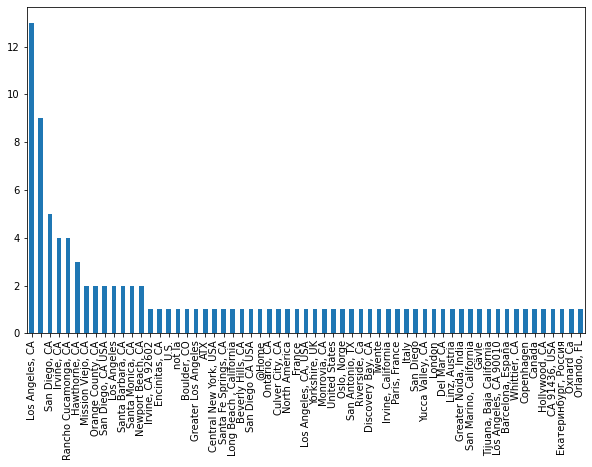

In [96]:
df.location.value_counts().plot(kind='bar',figsize=(10,6));

## Şimdi tweepy kütüphanesine geçelim

# Tweepy

In [120]:
auth = tweepy.AppAuthHandler(COMSUMER_KEY, CONSUMER_SECRET)
api = tweepy.API(auth)

In [149]:
def get_tweets(keyword: str) -> List[str]:
    
    all_tweets = []
    for tweet in tweepy.Cursor(api.search, q=keyword, tweet_mode='extended', lang='en').items(1000):
        all_tweets.append(tweet.full_text)
        
    return all_tweets

In [150]:
def clean_tweets(all_tweets: List[str]) -> List[str]:
    tweets_clean = []
    for tweet in all_tweets:
        tweets_clean.append(p.clean(tweet))
    return tweets_clean

In [151]:
a = get_tweets('Software')

In [152]:
b = clean_tweets(a)

In [153]:
df = pd.DataFrame()

In [154]:
df['tweets'] = b

In [155]:
df

,tweets
0,Today at pm! Join us to hear Geoff Rasmussen e...
1,: No hes got a point. Government agencies are ...
2,: Pick up the Humble Heal: Covid-19 Bundle thi...
3,Insider news: A tech startup is launching a wo...
4,Razer Is Bringing Real Sustainability Initiati...
...,...
995,Global Local SEO Software Market The leading I...
996,: Why/how to use these tools to better your / ...
997,Make At Least % From Our Strategy To - An Driv...
998,are an innovative and resource-efficient way t...


In [156]:
df[['polarity','subjectivity']]=df['tweets'].apply(lambda t:pd.Series(TextBlob(t).sentiment))

In [157]:
df

,tweets,polarity,subjectivity
0,Today at pm! Join us to hear Geoff Rasmussen e...,0.500000,0.800000
1,: No hes got a point. Government agencies are ...,0.000000,0.000000
2,: Pick up the Humble Heal: Covid-19 Bundle thi...,0.250000,0.662500
3,Insider news: A tech startup is launching a wo...,0.255000,0.510000
4,Razer Is Bringing Real Sustainability Initiati...,0.200000,0.300000
...,...,...,...
995,Global Local SEO Software Market The leading I...,0.000000,0.000000
996,: Why/how to use these tools to better your / ...,0.550000,0.700000
997,Make At Least % From Our Strategy To - An Driv...,-0.150000,0.250000
998,are an innovative and resource-efficient way t...,0.378788,0.651515


In [158]:
tokenizer=TreebankWordTokenizer()
df['tokenized']=[tokenizer.tokenize(i) for i in df['tweets'].values]

In [159]:
df

,tweets,polarity,subjectivity,tokenized
0,Today at pm! Join us to hear Geoff Rasmussen e...,0.500000,0.800000,"[Today, at, pm, !, Join, us, to, hear, Geoff, ..."
1,: No hes got a point. Government agencies are ...,0.000000,0.000000,"[:, No, hes, got, a, point., Government, agenc..."
2,: Pick up the Humble Heal: Covid-19 Bundle thi...,0.250000,0.662500,"[:, Pick, up, the, Humble, Heal, :, Covid-19, ..."
3,Insider news: A tech startup is launching a wo...,0.255000,0.510000,"[Insider, news, :, A, tech, startup, is, launc..."
4,Razer Is Bringing Real Sustainability Initiati...,0.200000,0.300000,"[Razer, Is, Bringing, Real, Sustainability, In..."
...,...,...,...,...
995,Global Local SEO Software Market The leading I...,0.000000,0.000000,"[Global, Local, SEO, Software, Market, The, le..."
996,: Why/how to use these tools to better your / ...,0.550000,0.700000,"[:, Why/how, to, use, these, tools, to, better..."
997,Make At Least % From Our Strategy To - An Driv...,-0.150000,0.250000,"[Make, At, Least, %, From, Our, Strategy, To, ..."
998,are an innovative and resource-efficient way t...,0.378788,0.651515,"[are, an, innovative, and, resource-efficient,..."


In [160]:
df.loc[df['subjectivity']>0.5,'sentiment']='pozitive' #pozitive
df.loc[df['subjectivity']==0.5,'sentiment']='neutral' #neutral
df.loc[df['subjectivity']<0.5,'sentiment']='negative' #negative

In [172]:
df

,tweets,polarity,subjectivity,tokenized,sentiment
0,Today at pm! Join us to hear Geoff Rasmussen e...,0.500000,0.800000,"[Today, at, pm, !, Join, us, to, hear, Geoff, ...",pozitive
1,: No hes got a point. Government agencies are ...,0.000000,0.000000,"[:, No, hes, got, a, point., Government, agenc...",negative
2,: Pick up the Humble Heal: Covid-19 Bundle thi...,0.250000,0.662500,"[:, Pick, up, the, Humble, Heal, :, Covid-19, ...",pozitive
3,Insider news: A tech startup is launching a wo...,0.255000,0.510000,"[Insider, news, :, A, tech, startup, is, launc...",pozitive
4,Razer Is Bringing Real Sustainability Initiati...,0.200000,0.300000,"[Razer, Is, Bringing, Real, Sustainability, In...",negative
...,...,...,...,...,...
995,Global Local SEO Software Market The leading I...,0.000000,0.000000,"[Global, Local, SEO, Software, Market, The, le...",negative
996,: Why/how to use these tools to better your / ...,0.550000,0.700000,"[:, Why/how, to, use, these, tools, to, better...",pozitive
997,Make At Least % From Our Strategy To - An Driv...,-0.150000,0.250000,"[Make, At, Least, %, From, Our, Strategy, To, ...",negative
998,are an innovative and resource-efficient way t...,0.378788,0.651515,"[are, an, innovative, and, resource-efficient,...",pozitive


# WordCloud

In [212]:
def create_wordcloud(text, imagepath):
    mask = np.array(Image.open(imagepath))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color = 'white',
                   mask = mask,
                   max_words = 25000,
                   stopwords = stopwords)
    wc.generate(str(text))
    wc.to_file('wc.png')
    print('Word Clous Saved Successfully')
    path='wc.png'
    display(Image.open(path))

In [213]:
sentiment1 = df[df['sentiment']=='negative']
sentiment2 = df[df['sentiment']=='pozitive']

Word Clous Saved Successfully


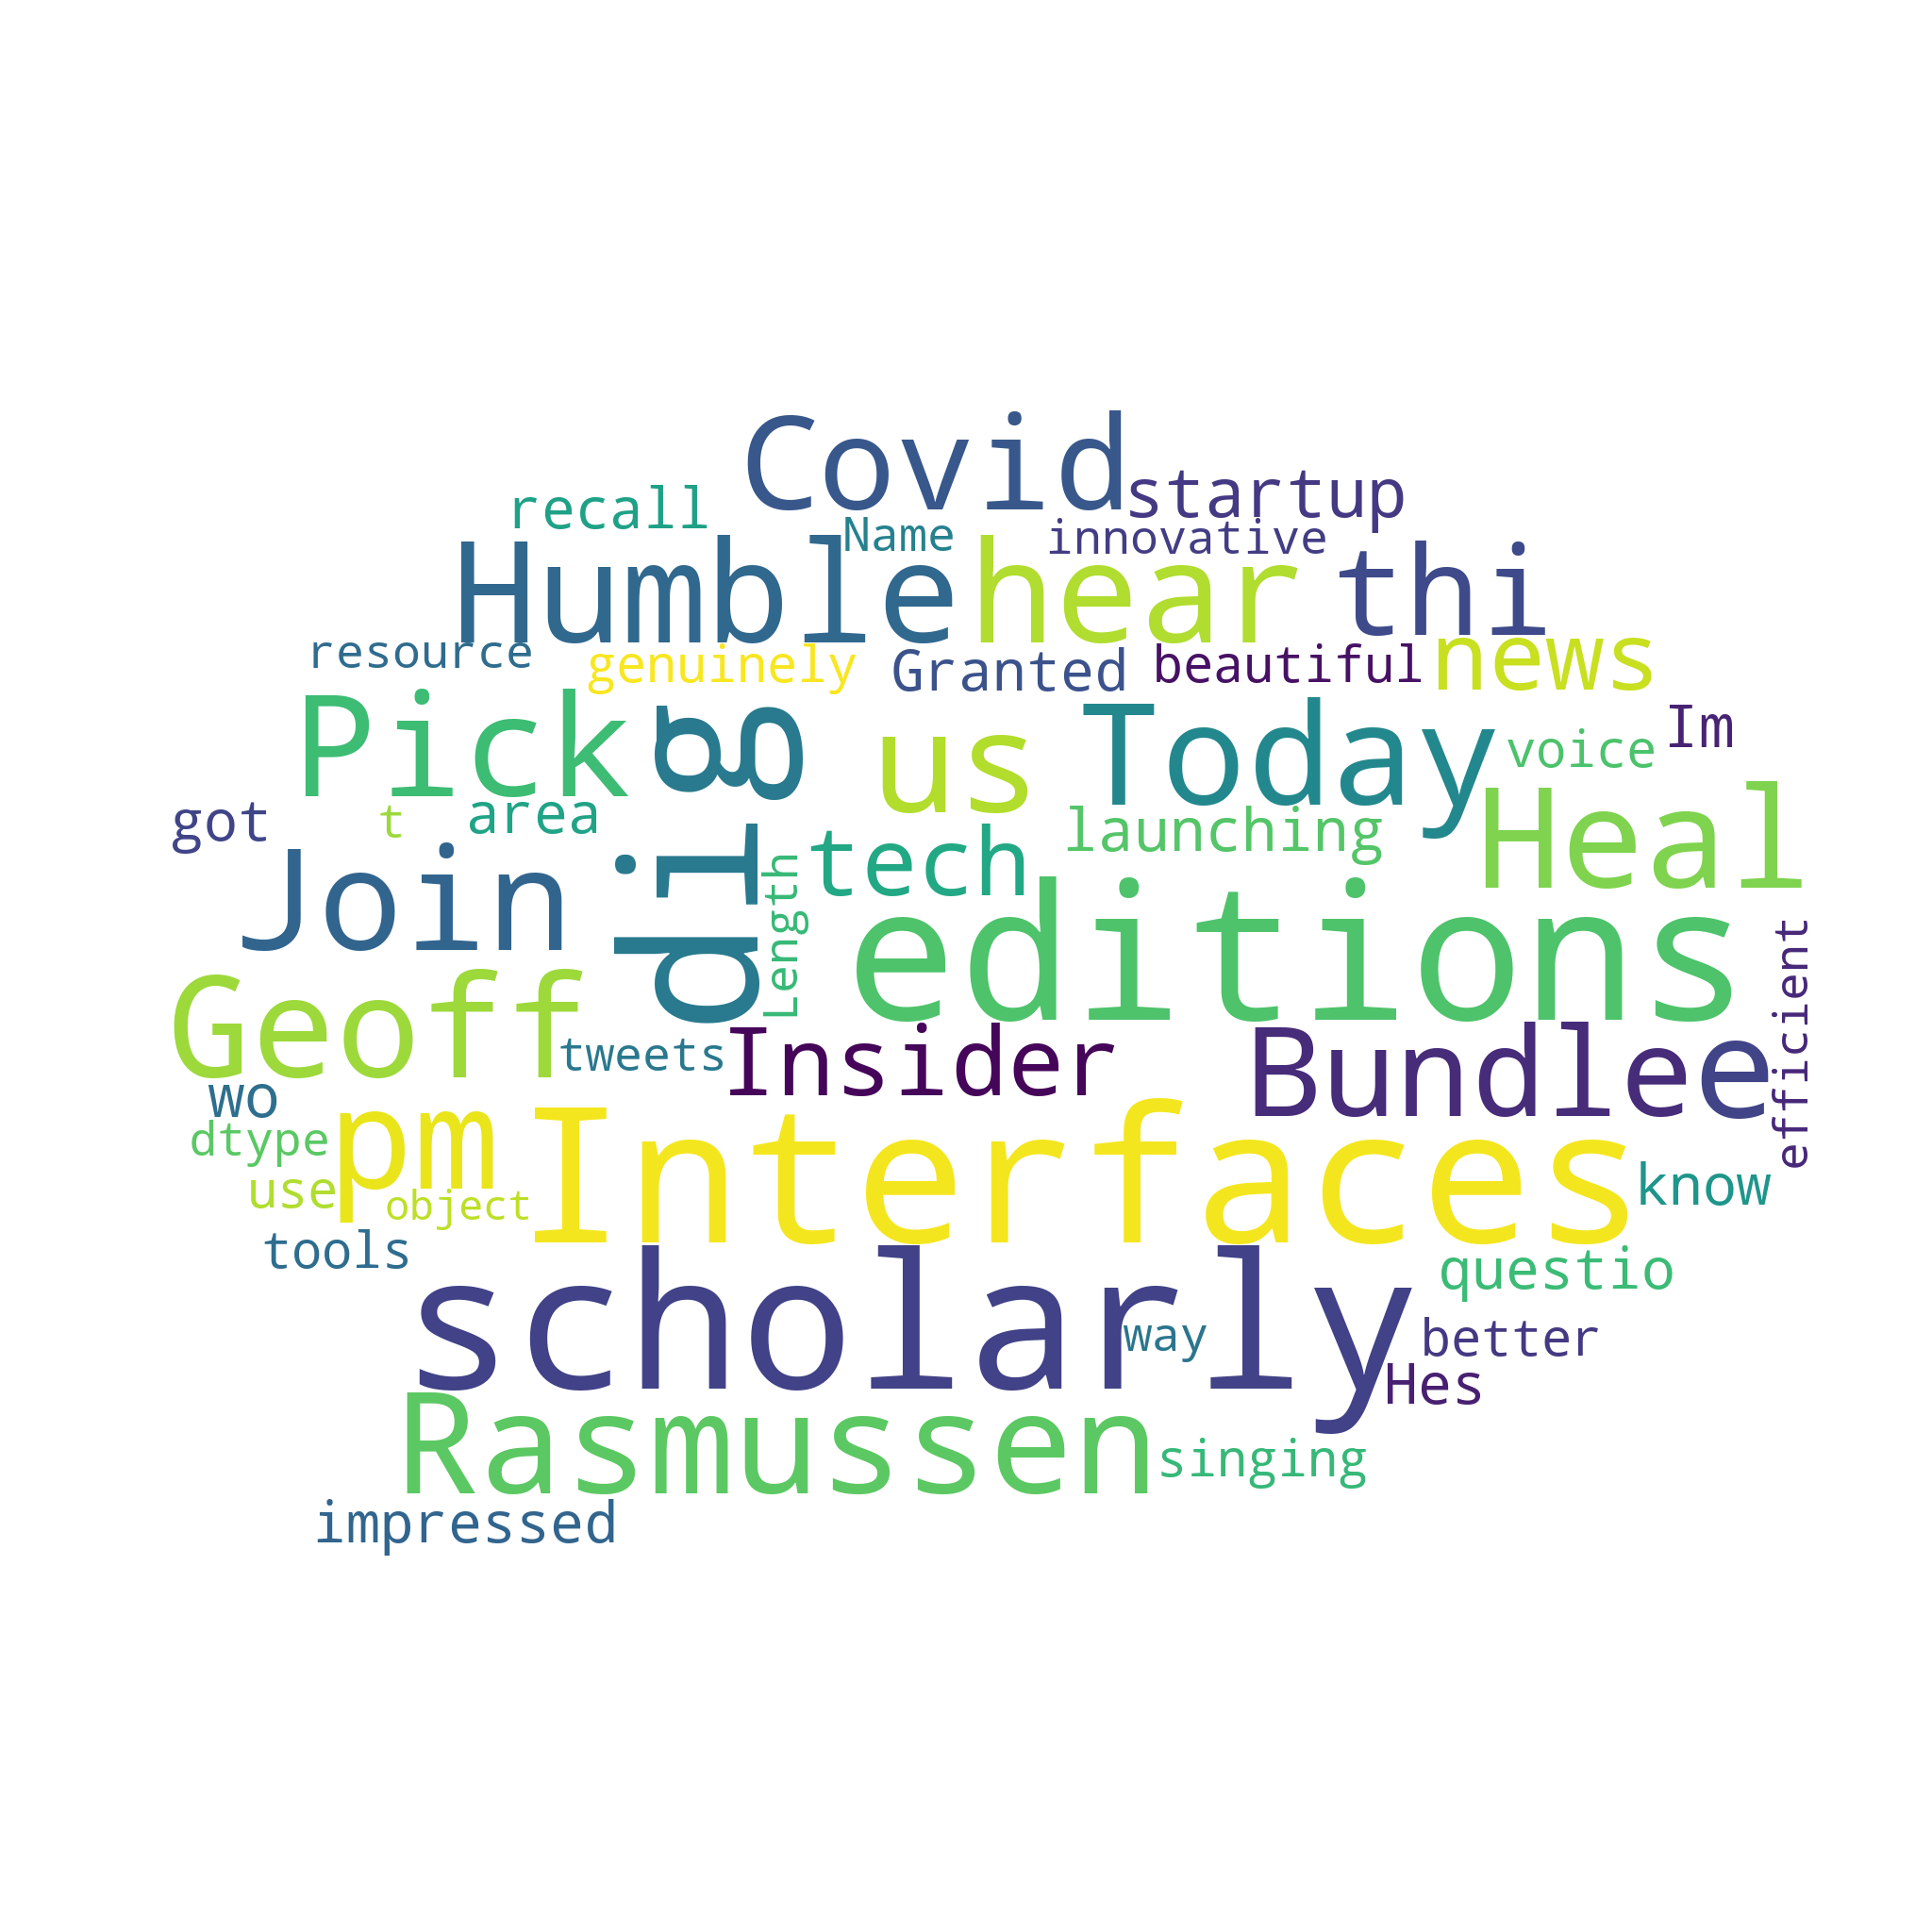

In [214]:
create_wordcloud(sentiment2.tweets, 'comment.png')

Word Clous Saved Successfully


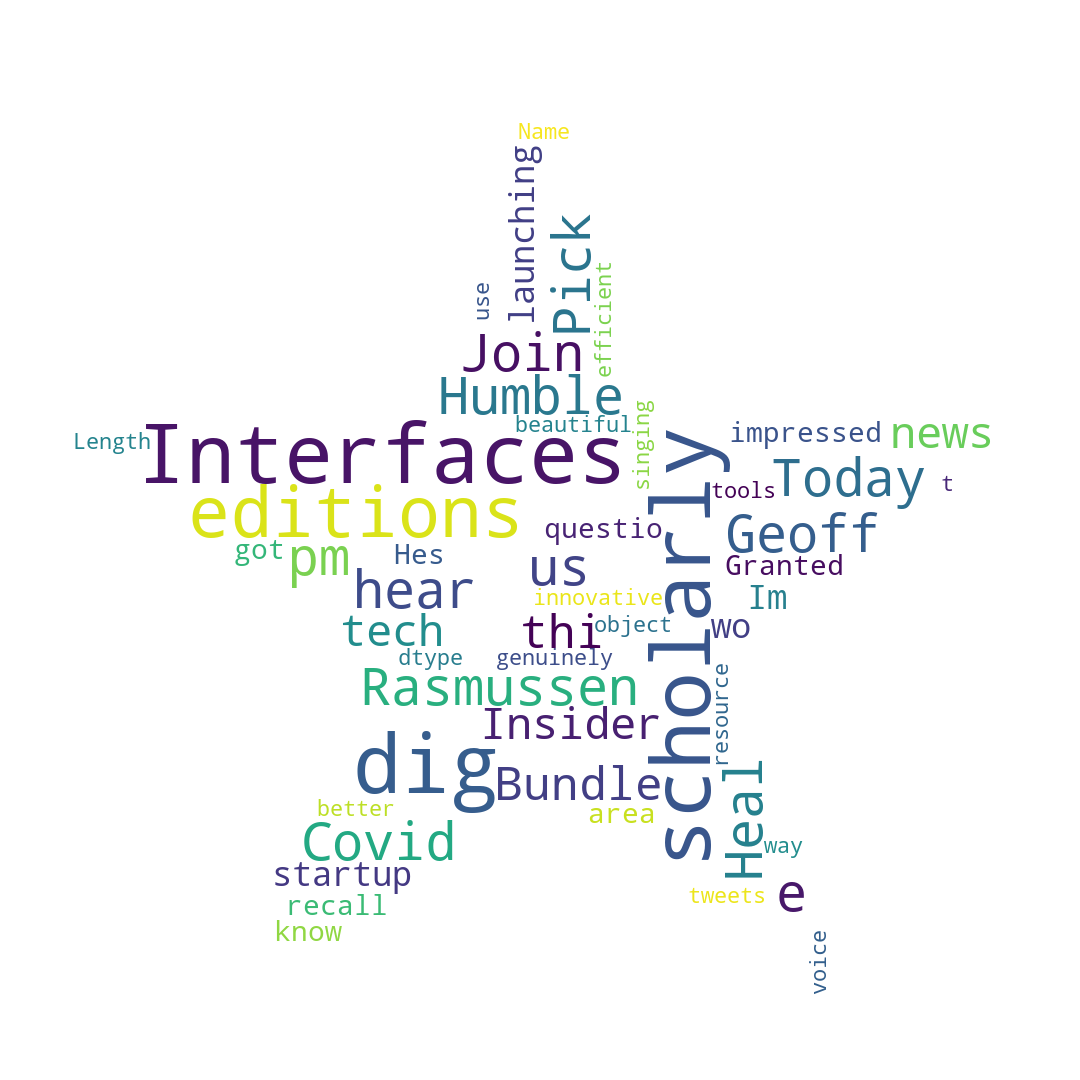

In [215]:
create_wordcloud(sentiment2.tweets,'star.png')

# Modelleme

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [177]:
df.sentiment = df.sentiment.astype('category')

In [178]:
x,y=df['tweets'],df['sentiment']

In [179]:
x.shape,y.shape

((1000,), (1000,))

In [180]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60)

In [181]:
y_test

724     neutral
958    negative
241    negative
541    pozitive
178    negative
         ...   
583    pozitive
304    negative
308    pozitive
789    negative
644    pozitive
Name: sentiment, Length: 250, dtype: category
Categories (3, object): ['negative', 'neutral', 'pozitive']

In [182]:
vect=CountVectorizer()
x_train_dtm=vect.fit_transform(x_train,y_train)
x_test_dtm=vect.transform(x_test)

In [183]:
x_train_dtm.shape,x_test_dtm.shape

((750, 3566), (250, 3566))

In [184]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [185]:
b=MultinomialNB()
model=b.fit(x_train_dtm,y_train)
b_predict=b.predict(x_test_dtm)

In [186]:
accuracy_score(y_test,b_predict)

0.752